In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium


#For Time Series 
from datetime import datetime as dt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX


%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023_V1.csv')
df.head()

CRASH DATE TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  2018-01-01 00:00:00    QUEENS     11419  40.68297  -73.82824   
1  2018-01-01 00:00:00  BROOKLYN     11239  40.65306  -73.88202   
2  2018-01-01 00:00:00  BROOKLYN     11230  40.62418  -73.97048   
3  2018-01-01 00:00:00  BROOKLYN     11234  40.62877  -73.91825   
4  2018-01-01 00:00:00  BROOKLYN     11230  40.62322  -73.96102   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          0                         0   

    CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0             Passing Too Closely       3819067   
1  Driver Inattention/Distraction       3820851   
2  Driver Inattention/Distraction       3822296   
3   Failure to Yield Right-of-Way       3820945   
4  Driver Inattention/Distraction       3821055   

                   VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                Sedan         Moving Violation  Winter   
1                                Sedan             Driver Error  Winter   
2  Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
3                                Sedan         Moving Violation  Winter   
4                                 Taxi             Driver Error  Winter   

  TIME OF DAY  IS RUSH HOUR  
0  Late Night         False  
1  Late Night         False  
2  Late Night         False  
3  Late Night         False  
4  Late Night         False

In [3]:
df_2023 = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2023_V1.csv')
df_2023

CRASH DATE TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0     2023-01-01 00:00:00    QUEENS     11101  40.745068 -73.936356   
1     2023-01-01 00:34:00    QUEENS     11435  40.713543 -73.812640   
2     2023-01-01 00:35:00  BROOKLYN     11229  40.601310 -73.954720   
3     2023-01-01 01:10:00  BROOKLYN     11223  40.593760 -73.982740   
4     2023-01-01 01:17:00    QUEENS     11375  40.724308 -73.842575   
...                   ...       ...       ...        ...        ...   
6146  2023-03-27 20:44:00  BROOKLYN     11238  40.670660 -73.957985   
6147  2023-03-27 21:50:00    QUEENS     11385  40.709038 -73.898460   
6148  2023-03-27 22:10:00  BROOKLYN     11218  40.640410 -73.969124   
6149  2023-03-27 23:07:00  BROOKLYN     11218  40.640316 -73.979070   
6150  2023-03-27 23:46:00  BROOKLYN     11211  40.713800 -73.933190   

      NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                             0                         0   
1                             1                         0   
2                             0                         0   
3                             2                         0   
4                             0                         0   
...                         ...                       ...   
6146                          1                         0   
6147                          1                         0   
6148                          1                         0   
6149                          0                         0   
6150                          4                         0   

       CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0     Driver Inattention/Distraction       4599239   
1                Alcohol Involvement       4594890   
2                   Backing Unsafely       4594332   
3                       Unsafe Speed       4594435   
4                Alcohol Involvement       4595209   
...                              ...           ...   
6146  Driver Inattention/Distraction       4616538   
6147   Failure to Yield Right-of-Way       4616419   
6148  Driver Inattention/Distraction       4616379   
6149                Backing Unsafely       4616380   
6150  Driver Inattention/Distraction       4616089   

                      VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0     Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
1                                   Sedan        Bodily Impairment  Winter   
2     Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
3     Station Wagon/Sport Utility Vehicle         Moving Violation  Winter   
4                                   Sedan        Bodily Impairment  Winter   
...                                   ...                      ...     ...   
6146  Station Wagon/Sport Utility Vehicle             Driver Error  Spring   
6147                                Moped         Moving Violation  Spring   
6148                                Sedan             Driver Error  Spring   
6149                            Box Truck         Moving Violation  Spring   
6150                                Sedan             Driver Error  Spring   

     TIME OF DAY  IS RUSH HOUR  
0     Late Night         False  
1     Late Night         False  
2     Late Night         False  
3     Late Night         False  
4     Late Night         False  
...          ...           ...  
6146       Night         False  
6147       Night         False  
6148       Night         False  
6149       Night         False  
6150       Night         False  

[6151 rows x 14 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213962 entries, 0 to 213961
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE TIME                213962 non-null  object 
 1   BOROUGH                        213962 non-null  object 
 2   ZIP CODE                       213962 non-null  int64  
 3   LATITUDE                       213962 non-null  float64
 4   LONGITUDE                      213962 non-null  float64
 5   NUMBER OF PERSONS INJURED      213962 non-null  int64  
 6   NUMBER OF PERSONS KILLED       213962 non-null  int64  
 7   CONTRIBUTING FACTOR VEHICLE 1  213962 non-null  object 
 8   COLLISION_ID                   213962 non-null  int64  
 9   VEHICLE TYPE CODE 1            213962 non-null  object 
 10  CONTRIBUTING CATEGORY V1       213962 non-null  object 
 11  SEASON                         213962 non-null  object 
 12  TIME OF DAY                   

#### Changing DateTime Index

In [5]:
#Change column to datetime datatype
df['CRASH DATE TIME'] = pd.to_datetime(df['CRASH DATE TIME'])
df_2023['CRASH DATE TIME'] = pd.to_datetime(df_2023['CRASH DATE TIME'])

In [6]:
ts = df.copy()
ts_2023 = df_2023.copy()
ts.head()

CRASH DATE TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0      2018-01-01    QUEENS     11419  40.68297  -73.82824   
1      2018-01-01  BROOKLYN     11239  40.65306  -73.88202   
2      2018-01-01  BROOKLYN     11230  40.62418  -73.97048   
3      2018-01-01  BROOKLYN     11234  40.62877  -73.91825   
4      2018-01-01  BROOKLYN     11230  40.62322  -73.96102   

   NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          1                         0   
4                          0                         0   

    CONTRIBUTING FACTOR VEHICLE 1  COLLISION_ID  \
0             Passing Too Closely       3819067   
1  Driver Inattention/Distraction       3820851   
2  Driver Inattention/Distraction       3822296   
3   Failure to Yield Right-of-Way       3820945   
4  Driver Inattention/Distraction       3821055   

                   VEHICLE TYPE CODE 1 CONTRIBUTING CATEGORY V1  SEASON  \
0                                Sedan         Moving Violation  Winter   
1                                Sedan             Driver Error  Winter   
2  Station Wagon/Sport Utility Vehicle             Driver Error  Winter   
3                                Sedan         Moving Violation  Winter   
4                                 Taxi             Driver Error  Winter   

  TIME OF DAY  IS RUSH HOUR  
0  Late Night         False  
1  Late Night         False  
2  Late Night         False  
3  Late Night         False  
4  Late Night         False

### Groupby Weekly

In [7]:
# Group the values by week and count the number of instances of each value
ts_count = ts.groupby([pd.Grouper(key='CRASH DATE TIME', freq='W'), 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')
ts2023_count = ts_2023.groupby([pd.Grouper(key='CRASH DATE TIME', freq='W'), 'CONTRIBUTING CATEGORY V1']).size().reset_index(name='count')

# Print the result
print(ts_count)

     CRASH DATE TIME     CONTRIBUTING CATEGORY V1  count
0         2018-01-07            Bodily Impairment     21
1         2018-01-07                 Driver Error    358
2         2018-01-07        Environmental Factors     23
3         2018-01-07   Internal Electronics Usage      1
4         2018-01-07             Moving Violation    558
...              ...                          ...    ...
2449      2023-01-01           Other Distractions      1
2450      2023-01-01              Road Conditions      2
2451      2023-01-01  Third-Party (Non-Vehicular)      2
2452      2023-01-01      Third-Party (Vehicular)     13
2453      2023-01-01              Vehicle Defects      2

[2454 rows x 3 columns]


In [8]:
#Create pivot table of daily cause categories
ts_pivt = ts_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)
ts2023_pivt = ts2023_count.pivot(index='CRASH DATE TIME', columns='CONTRIBUTING CATEGORY V1', values='count').fillna(0)

ts_pivt.head(10)

CONTRIBUTING CATEGORY V1  Bodily Impairment  Driver Error  \
CRASH DATE TIME                                             
2018-01-07                             21.0         358.0   
2018-01-14                             20.0         439.0   
2018-01-21                             21.0         376.0   
2018-01-28                             29.0         396.0   
2018-02-04                             27.0         399.0   
2018-02-11                             38.0         422.0   
2018-02-18                             17.0         366.0   
2018-02-25                             33.0         396.0   
2018-03-04                             23.0         381.0   
2018-03-11                             24.0         421.0   

CONTRIBUTING CATEGORY V1  Environmental Factors  Internal Electronics Usage  \
CRASH DATE TIME                                                               
2018-01-07                                 23.0                         1.0   
2018-01-14                                 23.0                         3.0   
2018-01-21                                 22.0                         1.0   
2018-01-28                                 19.0                         1.0   
2018-02-04                                 22.0                         0.0   
2018-02-11                                 20.0                         1.0   
2018-02-18                                 15.0                         1.0   
2018-02-25                                  9.0                         2.0   
2018-03-04                                 23.0                         1.0   
2018-03-11                                 22.0                         2.0   

CONTRIBUTING CATEGORY V1  Moving Violation  Other Distractions  \
CRASH DATE TIME                                                  
2018-01-07                           558.0                 8.0   
2018-01-14                           704.0                 3.0   
2018-01-21                           582.0                 5.0   
2018-01-28                           568.0                 6.0   
2018-02-04                           568.0                 8.0   
2018-02-11                           589.0                 4.0   
2018-02-18                           559.0                 5.0   
2018-02-25                           579.0                 7.0   
2018-03-04                           621.0                 6.0   
2018-03-11                           583.0                 7.0   

CONTRIBUTING CATEGORY V1  Road Conditions  Third-Party (Non-Vehicular)  \
CRASH DATE TIME                                                          
2018-01-07                          131.0                          7.0   
2018-01-14                           35.0                          7.0   
2018-01-21                           11.0                          4.0   
2018-01-28                           10.0                          8.0   
2018-02-04                            7.0                         10.0   
2018-02-11                           28.0                          6.0   
2018-02-18                           23.0                          5.0   
2018-02-25                            7.0                          9.0   
2018-03-04                           17.0                         12.0   
2018-03-11                           43.0                          3.0   

CONTRIBUTING CATEGORY V1  Third-Party (Vehicular)  Vehicle Defects  
CRASH DATE TIME                                                     
2018-01-07                                   41.0             18.0  
2018-01-14                                   55.0             10.0  
2018-01-21                                   40.0             12.0  
2018-01-28                                   40.0              5.0  
2018-02-04                                   42.0             17.0  
2018-02-11                                   39.0             16.0  
2018-02-18                                   49.0              4.0  
2018-02-25     

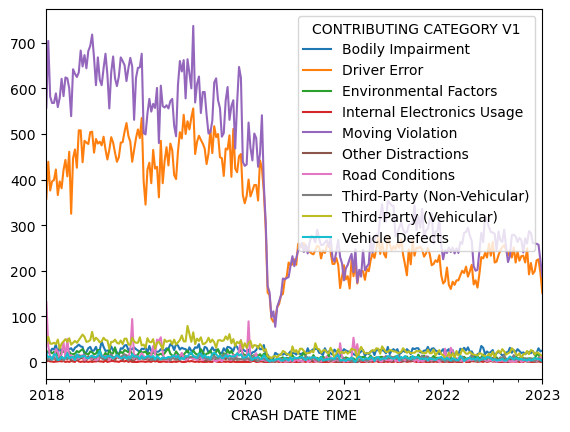

In [9]:
ts_pivt.plot();

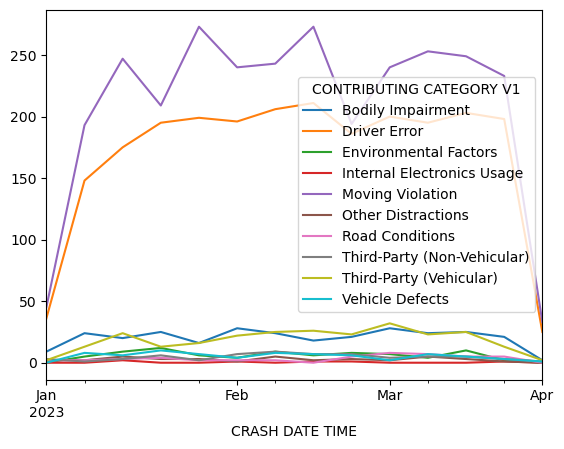

In [10]:
ts2023_pivt.plot();

In [11]:
#Converting the index as datetime index
ts_pivt.index = pd.to_datetime(ts_pivt.index)
ts2023_pivt.index = pd.to_datetime(ts2023_pivt.index)

In [12]:
#Select highest causes of collision
ts_mv = ts_pivt[['Moving Violation']]
ts_mv

CONTRIBUTING CATEGORY V1  Moving Violation
CRASH DATE TIME                           
2018-01-07                           558.0
2018-01-14                           704.0
2018-01-21                           582.0
2018-01-28                           568.0
2018-02-04                           568.0
...                                    ...
2022-12-04                           260.0
2022-12-11                           259.0
2022-12-18                           257.0
2022-12-25                           221.0
2023-01-01                           187.0

[261 rows x 1 columns]

In [13]:

ts2023_mv = ts2023_pivt[['Moving Violation']]
ts2023_mv

CONTRIBUTING CATEGORY V1  Moving Violation
CRASH DATE TIME                           
2023-01-01                            45.0
2023-01-08                           193.0
2023-01-15                           247.0
2023-01-22                           209.0
2023-01-29                           273.0
2023-02-05                           240.0
2023-02-12                           243.0
2023-02-19                           273.0
2023-02-26                           194.0
2023-03-05                           240.0
2023-03-12                           253.0
2023-03-19                           249.0
2023-03-26                           233.0
2023-04-02                            33.0

In [14]:
ts_mv.describe()

CONTRIBUTING CATEGORY V1  Moving Violation
count                           261.000000
mean                            400.467433
std                             175.373107
min                              77.000000
25%                             257.000000
50%                             308.000000
75%                             577.000000
max                             737.000000

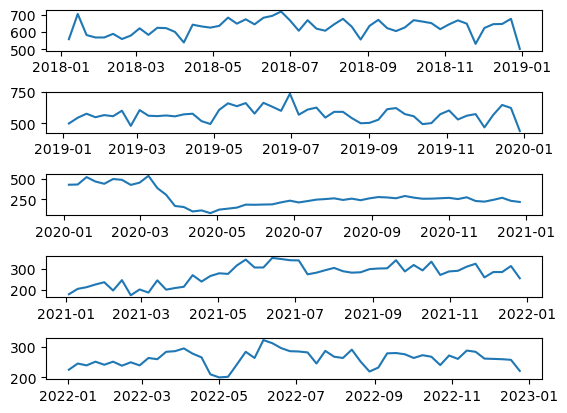

In [15]:
from pandas import Grouper, DataFrame
from matplotlib import pyplot


groups = ts_mv['2018':'2022'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
plt.subplots_adjust(hspace=1.0)

i = 1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100) + 10 + i)
  i += 1
  pyplot.plot(group)
pyplot.show()

In [102]:
#create interactive range selector 
import plotly.express as px
fig = px.line(ts_mv, x= ts_mv.index, y='Moving Violation')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.show();

## Figuring it Out..

In [16]:
diff_shift_ts_mv = ts_mv.copy()

#Differencing
diff_shift_ts_mv['Differenced'] = diff_shift_ts_mv.diff().dropna()
diff_shift_ts_mv

CONTRIBUTING CATEGORY V1  Moving Violation  Differenced
CRASH DATE TIME                                        
2018-01-07                           558.0          NaN
2018-01-14                           704.0        146.0
2018-01-21                           582.0       -122.0
2018-01-28                           568.0        -14.0
2018-02-04                           568.0          0.0
...                                    ...          ...
2022-12-04                           260.0         -1.0
2022-12-11                           259.0         -1.0
2022-12-18                           257.0         -2.0
2022-12-25                           221.0        -36.0
2023-01-01                           187.0        -34.0

[261 rows x 2 columns]

In [17]:
diff_shift_ts_mv['One Shift'] = diff_shift_ts_mv['Moving Violation'].shift(1)
diff_shift_ts_mv

CONTRIBUTING CATEGORY V1  Moving Violation  Differenced  One Shift
CRASH DATE TIME                                                   
2018-01-07                           558.0          NaN        NaN
2018-01-14                           704.0        146.0      558.0
2018-01-21                           582.0       -122.0      704.0
2018-01-28                           568.0        -14.0      582.0
2018-02-04                           568.0          0.0      568.0
...                                    ...          ...        ...
2022-12-04                           260.0         -1.0      261.0
2022-12-11                           259.0         -1.0      260.0
2022-12-18                           257.0         -2.0      259.0
2022-12-25                           221.0        -36.0      257.0
2023-01-01                           187.0        -34.0      221.0

[261 rows x 3 columns]

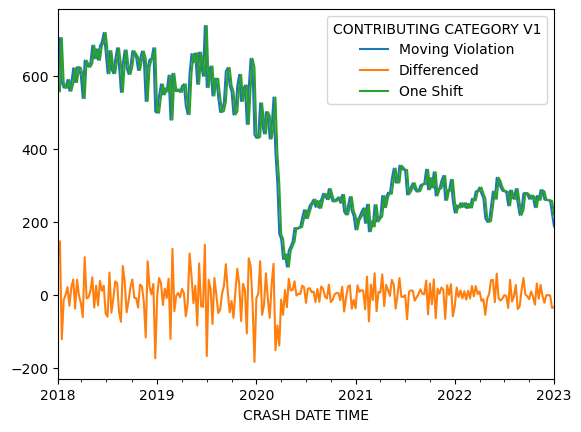

In [18]:
diff_shift_ts_mv.plot();

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Using log transformation as it decreased the p-value the most of the previous transformations
decomposition = seasonal_decompose(np.sqrt(ts_mv['Moving Violation']))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [20]:
ts_mv.isna()

CONTRIBUTING CATEGORY V1  Moving Violation
CRASH DATE TIME                           
2018-01-07                           False
2018-01-14                           False
2018-01-21                           False
2018-01-28                           False
2018-02-04                           False
...                                    ...
2022-12-04                           False
2022-12-11                           False
2022-12-18                           False
2022-12-25                           False
2023-01-01                           False

[261 rows x 1 columns]

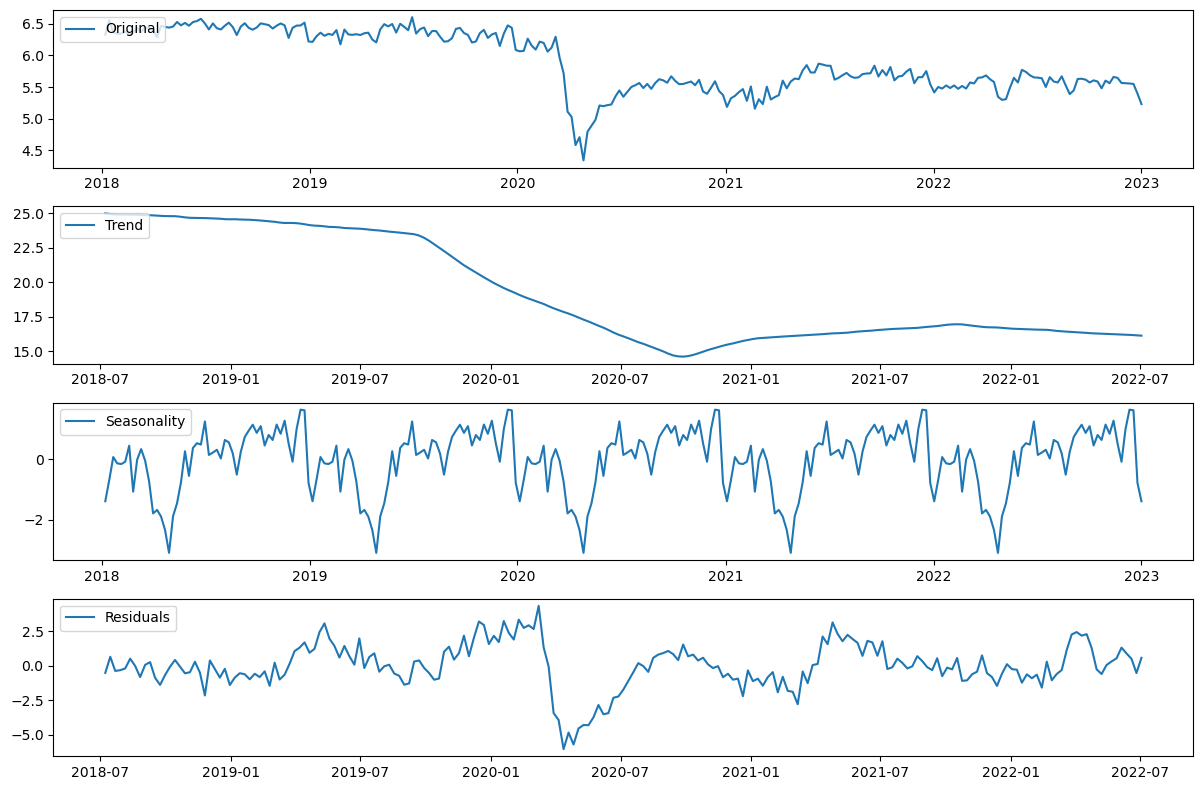

In [21]:
# Plot gathered statistics
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(np.log(ts_mv['Moving Violation']), label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

From these plots, we can see that there was a downwards trend in the data which is likely caused by the 2020 COVID pandemic stay at home order. 

There is a cyclic trend of seasonality within the data.

## Stationarity
Before we can begin modeling, we must check the stationarity of the dataset. A stationary dataset is required for Time Series models to perform well and accurately. The Dickey-Fuller statistical test will be utilized to verify stationarity.

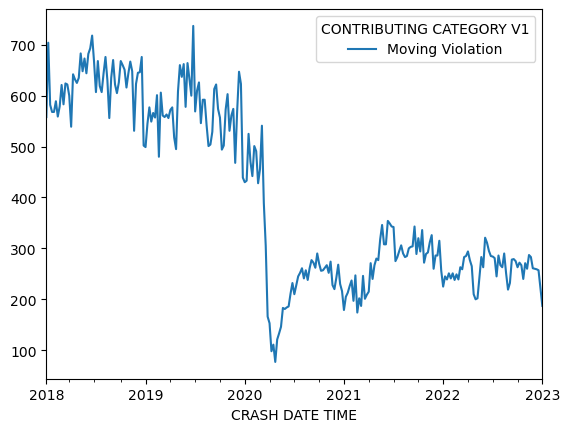

In [22]:
ts_mv.plot();

In [23]:
from statsmodels.tsa.stattools import adfuller

vtest = adfuller(ts_mv)
vtest

(-1.2201982510610434,
 0.664847146888407,
 3,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2541.4538927602907)

In [24]:
p_val = adfuller(ts_mv)[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" therefore we can safely assume that the data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that the data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.664847146888407,
 therefore we cannot reject the null hypothesis that the data is not stationary.


### Differencing
To make the dataset stationary, we will be differencing the data. 

In [25]:
#Difference the data and drop the NaN values
diff = ts_mv.diff().dropna()

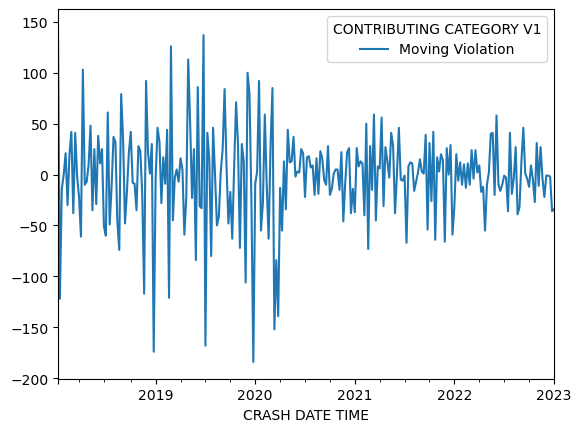

In [26]:
diff.plot();

The first differencing of the data looks to have removed the strong trend within the dataset and looks like it is stationary, however, we will double check the stationarity with the Dickey-Fuller statistical test. 

In [27]:
#Dickey-Fuller test to verify stationarity
difftest = adfuller(diff)
difftest

(-12.385592848400405,
 4.917740633589227e-23,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 2531.7724427004814)

In [28]:
#Sanity check to confirm stationarity
diff_pval = adfuller(diff)[1]

print(f"The p-value associated with the Dickey-Fuller statistical test is {diff_pval},")
if diff_pval < 0.05:
    print(" therefore we can safely assume that subtracted rolling mean data is stationary.")
else:
    print(" therefore we cannot reject the null hypothesis that subtracted rolling mean data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 4.917740633589227e-23,
 therefore we can safely assume that subtracted rolling mean data is stationary.


## Train Test Split

In [29]:
# find the index which allows us to split off 20% of the data
cutoff = round(ts_mv.shape[0]*0.8) #cut off point at 80% of the data
cutoff

209

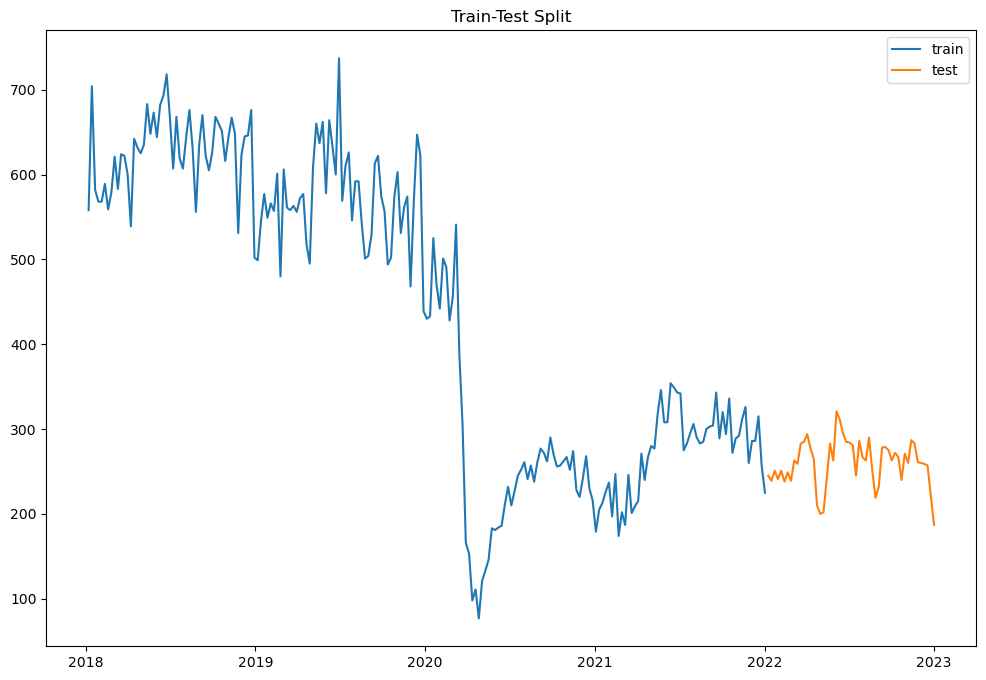

In [30]:
# Define train and test sets according to the index found above
train = ts_mv[:cutoff] #before cut off is train set -- 80%

test = ts_mv[cutoff:] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

# Baseline Model
The baseline model is a naive model, which is just one shift in time by one period in time and in this case, it would be by 1 week. The metric that will be used to determine the quality and effectiveness of the model will be Root Mean Squared Error (RMSE). 

In [31]:
#
plt.figure(figsize=(12, 8))

baseline = ts_mv.copy()
baseline['One Shift'] = baseline['Moving Violation'].shift(1)
baseline

CONTRIBUTING CATEGORY V1  Moving Violation  One Shift
CRASH DATE TIME                                      
2018-01-07                           558.0        NaN
2018-01-14                           704.0      558.0
2018-01-21                           582.0      704.0
2018-01-28                           568.0      582.0
2018-02-04                           568.0      568.0
...                                    ...        ...
2022-12-04                           260.0      261.0
2022-12-11                           259.0      260.0
2022-12-18                           257.0      259.0
2022-12-25                           221.0      257.0
2023-01-01                           187.0      221.0

[261 rows x 2 columns]

<Figure size 1200x800 with 0 Axes>

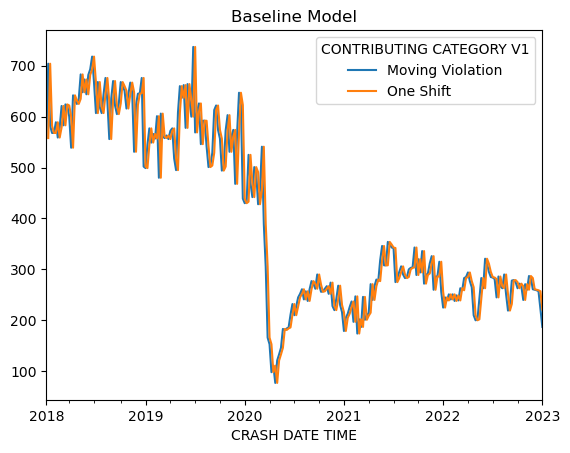

In [32]:
#
baseline.plot()
plt.title('Baseline Model');

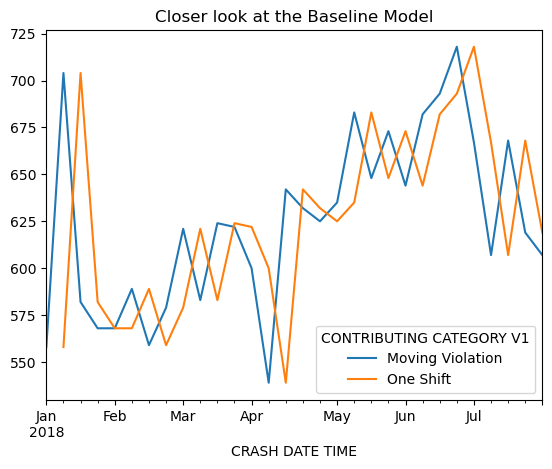

In [33]:
#A closer look
baseline[0:30].plot()
plt.title('Closer look at the Baseline Model');

In [34]:
#
plt.figure(figsize=(12, 8))

baseline = train.copy()
baseline['One Shift'] = baseline['Moving Violation'].shift(1)

baseline_test = baseline[1:]
baseline_test

CONTRIBUTING CATEGORY V1  Moving Violation  One Shift
CRASH DATE TIME                                      
2018-01-14                           704.0      558.0
2018-01-21                           582.0      704.0
2018-01-28                           568.0      582.0
2018-02-04                           568.0      568.0
2018-02-11                           589.0      568.0
...                                    ...        ...
2021-12-05                           286.0      260.0
2021-12-12                           286.0      286.0
2021-12-19                           315.0      286.0
2021-12-26                           256.0      315.0
2022-01-02                           225.0      256.0

[208 rows x 2 columns]

<Figure size 1200x800 with 0 Axes>

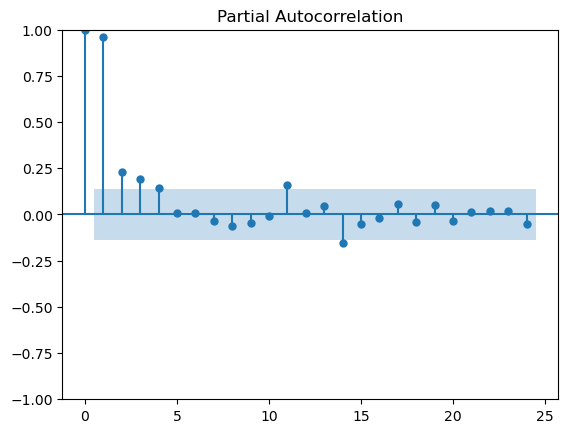

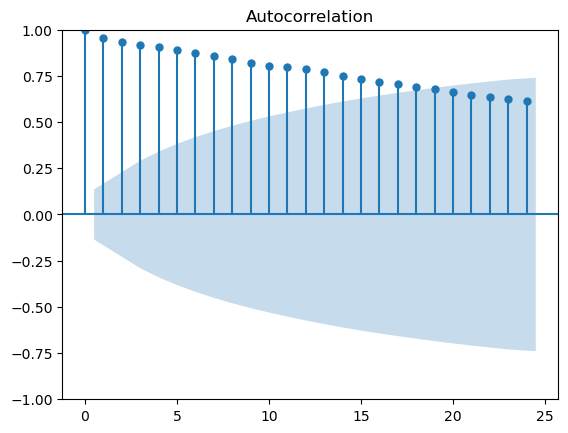

In [35]:
#Plot_pacf is used to identify the p parameter 
pacf_baselinediff2 = plot_pacf(baseline_test['One Shift'])

#Plot_acf is used to identify the q parameter
acf_baselinediff2 = plot_acf(baseline_test['One Shift'])

In [36]:
#
baseline_rmse = np.sqrt(mean_squared_error(baseline_test['Moving Violation'], baseline_test['One Shift']))

print(f'Baseline Model RMSE: {baseline_rmse}')

Baseline Model RMSE: 50.86742761638033


## First Simple Model - ARIMA

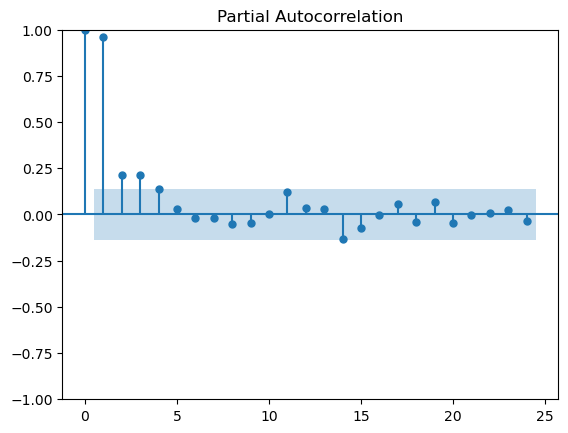

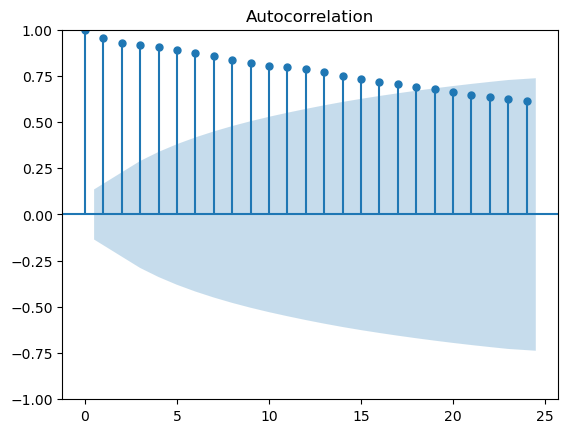

In [37]:
#Plot_pacf is used to identify the p parameter 
plot_pacf(train)

#Plot_acf is used to identify the q parameter
plot_acf(train);

p = 1 and q = 1

In [38]:
#ARIMA model 
first_model = ARIMA(train['Moving Violation'], order=(1, 1, 1)).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1100.701
Date:                Wed, 12 Apr 2023   AIC                           2207.403
Time:                        13:54:41   BIC                           2217.415
Sample:                    01-07-2018   HQIC                          2211.451
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2296      0.149      1.544      0.123      -0.062       0.521
ma.L1         -0.5683      0.126     -4.500      0.000      -0.816      -0.321
sigma2      2309.5934    158.444     14.577      0.000    1999.050    2620.137
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                51.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
#Get th predictions
train_pred1 = first_model.predict()

#Calculate the Root Mean Square Error
first_model_rmse = np.sqrt(mean_squared_error(train, train_pred1))

print(f'First Model RMSE: {first_model_rmse}')

First Model RMSE: 61.65141351070086


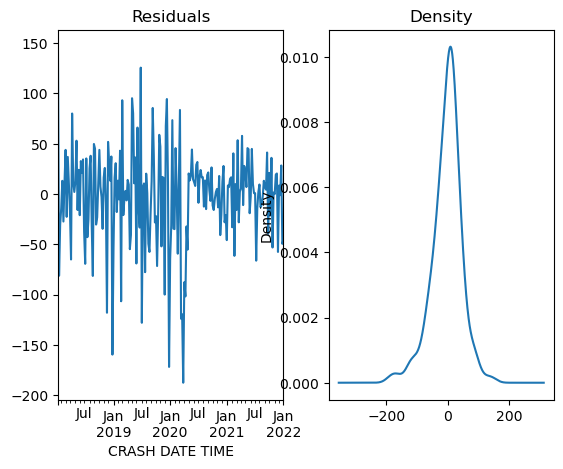

In [41]:
#Checking the residuals to see if it looks like white noise
#Checking if density has a normal distribution
residuals1 = first_model.resid[1:]
fig, ax = plt.subplots(1,2)
residuals1.plot(title='Residuals', ax=ax[0])
residuals1.plot(title='Density', kind='kde', ax=ax[1])
plt.show();

The density plot shows a normal distribution. 

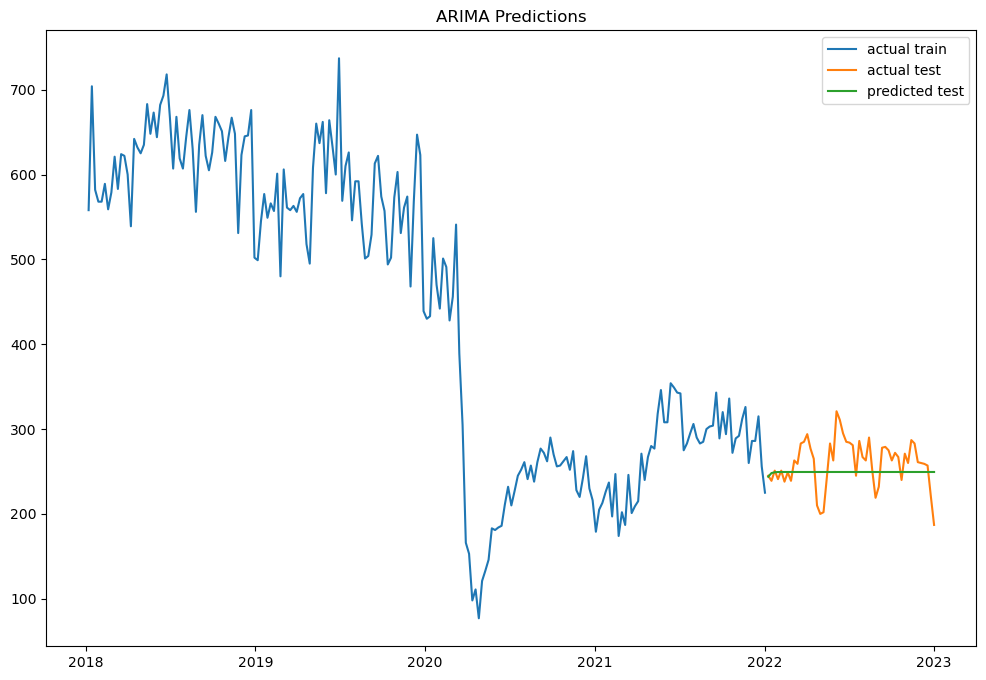

In [141]:
#Generate predictions for the test set
df_pred = first_model.predict(start='2022-01-09', end='2023-01-01')

# plot actual vs. predicted
fig = plt.figure(figsize=(12, 8))
plt.title('ARIMA Predictions')
plt.plot(train, label='actual train')
plt.plot(test, label='actual test')
plt.plot(df_pred, label='predicted test');
plt.legend();

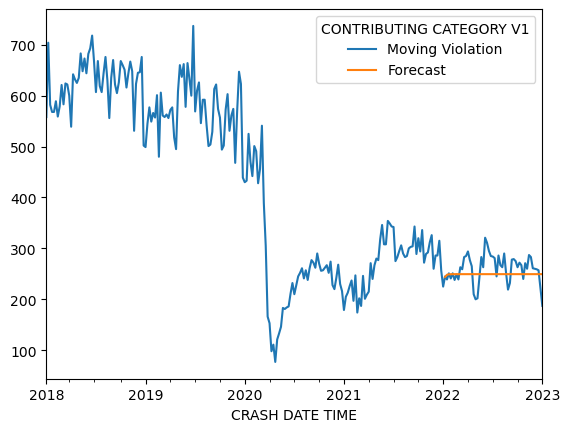

In [43]:
#Forecast future predictions onto the dataset
forecast_test = first_model.forecast(len(test))
ts_mv1=ts_mv.copy()
ts_mv1['Forecast'] = [None]*len(train) + list(forecast_test)

ts_mv1.plot();

## Second Model - SARIMA using Auto ARIMA
Code Source: https://towardsdatascience.com/time-series-forecasting-with-sarima-in-python-cda5b793977b

In [44]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [45]:
from itertools import product

p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [46]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 4, ts_mv['Moving Violation'])
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

(p,q)x(P,Q)          AIC
0    (2, 3, 1, 2)  2688.144845
1    (2, 3, 2, 3)  2690.403029
2    (0, 2, 0, 1)  2690.412301
3    (1, 1, 0, 1)  2690.674299
4    (0, 1, 0, 1)  2691.388756
..            ...          ...
251  (0, 1, 0, 0)  2838.720965
252  (2, 0, 0, 0)  2841.498270
253  (1, 0, 0, 0)  2843.327097
254  (3, 0, 0, 0)  2843.363355
255  (0, 0, 0, 0)  2856.158228

[256 rows x 2 columns]

In [47]:
second_model = SARIMAX(ts_mv['Moving Violation'], order=(2, 1, 3), seasonal_order=(1, 1, 2, 12)).fit(dis=-1)
second_model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09460D+00    |proj g|=  8.11824D-02

At iterate    5    f=  5.07386D+00    |proj g|=  6.59732D-03

At iterate   10    f=  5.05681D+00    |proj g|=  6.51158D-02

At iterate   15    f=  5.01755D+00    |proj g|=  7.93283D-02

At iterate   20    f=  5.01132D+00    |proj g|=  2.80073D-02

At iterate   25    f=  5.00730D+00    |proj g|=  1.60388D-02

At iterate   30    f=  5.00684D+00    |proj g|=  5.31750D-04

At iterate   35    f=  5.00681D+00    |proj g|=  1.60477D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                        Moving Violation   No. Observations:                  261
Model:             SARIMAX(2, 1, 3)x(1, 1, [1, 2], 12)   Log Likelihood               -1306.778
Date:                                 Wed, 12 Apr 2023   AIC                           2631.555
Time:                                         14:00:38   BIC                           2663.176
Sample:                                     01-07-2018   HQIC                          2644.285
                                          - 01-01-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3948      0.132     10.542      0.000       1.135       1.654
ar.L2         -0.9158      0.145     -6.305      0.000      -1.200      -0.631
ma.L1         -1.7561      0.147    -11.929      0.000      -2.045      -1.468
ma.L2          1.3940      0.221      6.319      0.000       0.962       1.826
ma.L3         -0.2935      0.095     -3.101      0.002      -0.479      -0.108
ar.S.L12      -0.9347      0.355     -2.634      0.008      -1.630      -0.239
ma.S.L12      -0.0361      9.221     -0.004      0.997     -18.109      18.037
ma.S.L24      -0.9630      8.599     -0.112      0.911     -17.816      15.890
sigma2      1900.2942   1.71e+04      0.111      0.912   -3.17e+04    3.55e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                83.22
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

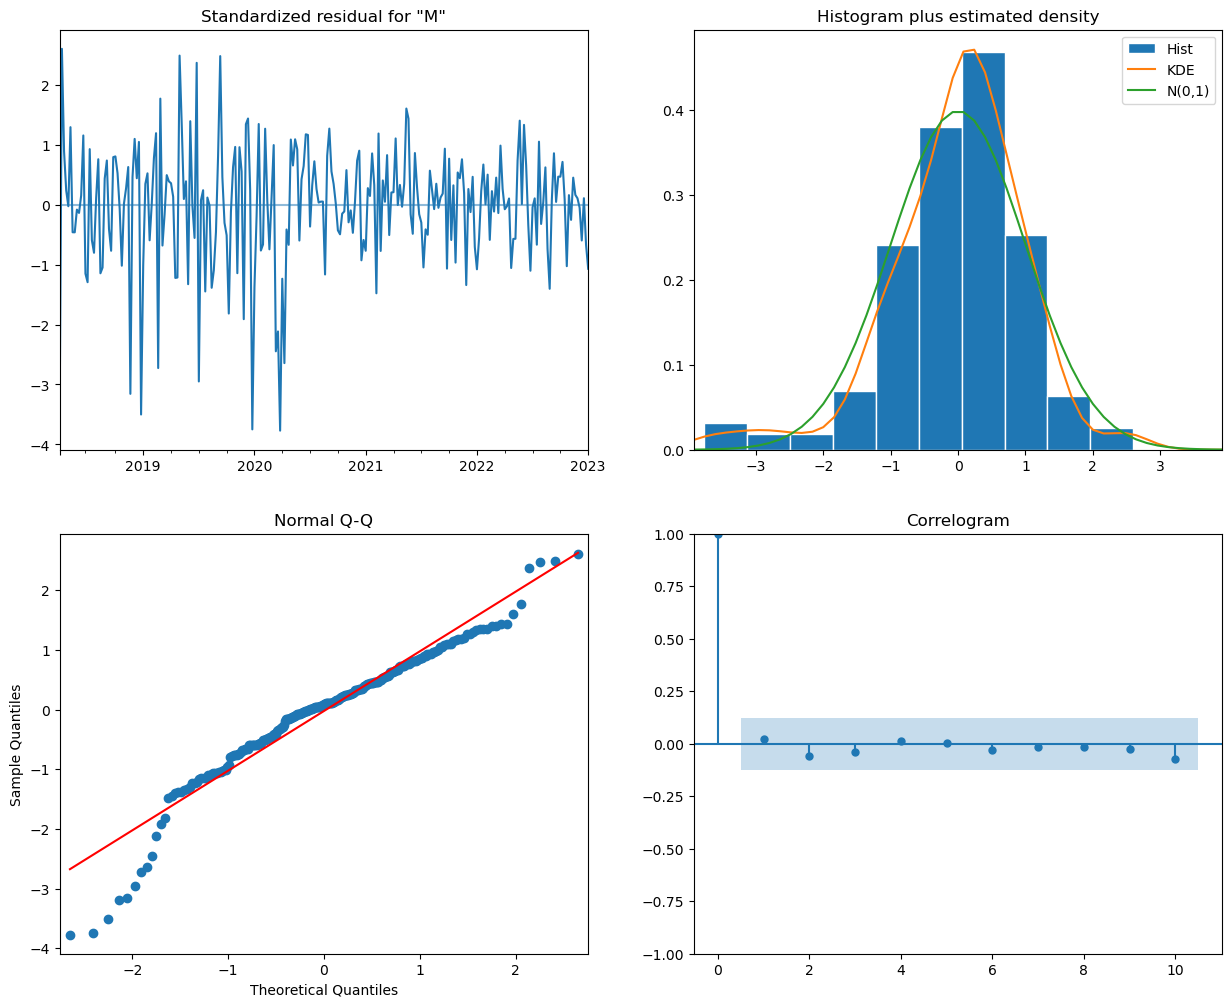

In [48]:
second_model.plot_diagnostics(figsize=(15,12));


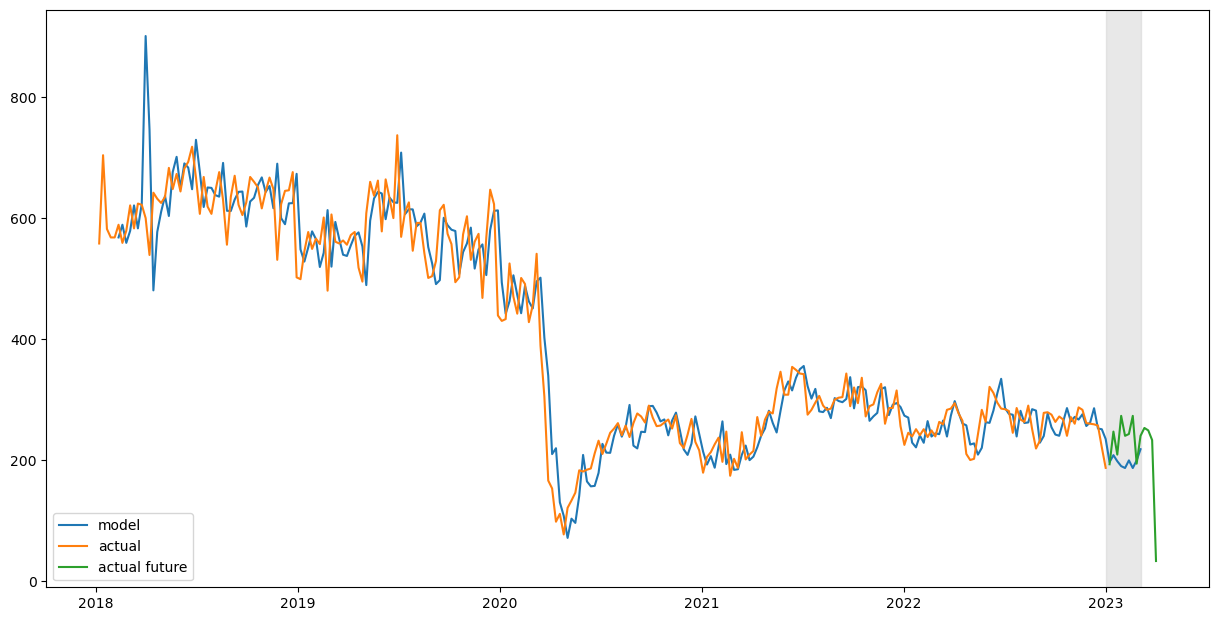

In [49]:
ts_mv['arima_model'] = second_model.fittedvalues
ts_mv['arima_model'][:4+1] = np.NaN
forecast = second_model.predict(start=ts_mv.shape[0], end=ts_mv.shape[0] + 8)
forecast = ts_mv['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, label='model')
plt.axvspan(ts_mv.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(ts_mv['Moving Violation'], label='actual')
plt.plot(ts2023_mv['Moving Violation'][1:], label='actual future')
plt.legend()
plt.show()

In [50]:
train2_pred = forecast.dropna()
train2_pred = train2_pred[:'2022-02-10']
train2_pred

2018-02-11    568.029801
2018-02-18    588.999895
2018-02-25    559.046693
2018-03-04    578.966259
2018-03-11    620.924486
                 ...    
2022-01-09    270.139385
2022-01-16    228.798713
2022-01-23    220.940439
2022-01-30    240.685250
2022-02-06    228.506713
Length: 209, dtype: float64

In [51]:
#
second_model_rmse = np.sqrt(mean_squared_error(train, train2_pred))

print(f'Second Model RMSE: {second_model_rmse}')

Second Model RMSE: 67.47305060781855


In [52]:
print(f'Baseline Model RMSE: {baseline_rmse}')
print(f'First Model RMSE: {first_model_rmse}')
print(f'Second Model RMSE: {second_model_rmse}')

Baseline Model RMSE: 50.86742761638033
First Model RMSE: 61.65141351070086
Second Model RMSE: 67.47305060781855


# AUTO ARIMAA

In [53]:
model = auto_arima(ts_mv['Moving Violation'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2744.048, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2740.050, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2726.347, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2718.200, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2738.293, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2717.101, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2718.178, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2719.906, Time=0.93 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2715.796, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2717.533, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2717.538, Time=0.37 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2725.252, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2717.199, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[12]

In [54]:
#d is 0 because the dataset is already differenced
third_model = SARIMAX(train['Moving Violation'], order=(0, 1, 2), seasonal_order=(0,0,0,12)).fit()
third_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.26587D+00    |proj g|=  1.79151D-02

At iterate    5    f=  5.26558D+00    |proj g|=  1.49568D-03

At iterate   10    f=  5.26543D+00    |proj g|=  3.16014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   3.864D-06   5.265D+00
  F =   5.2654176614688222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Moving Violation   No. Observations:                  209
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1100.472
Date:                Wed, 12 Apr 2023   AIC                           2206.945
Time:                        14:00:50   BIC                           2216.957
Sample:                    01-07-2018   HQIC                          2210.993
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3287      0.050     -6.613      0.000      -0.426      -0.231
ma.L2         -0.1092      0.058     -1.900      0.057      -0.222       0.003
sigma2      2304.5688    157.092     14.670      0.000    1996.675    2612.463
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.38
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
#
train_pred3 = third_model.predict()

#
third_model_rmse = np.sqrt(mean_squared_error(train, train_pred3))

print(f'First Model RMSE: {third_model_rmse}')


First Model RMSE: 61.611598816954604


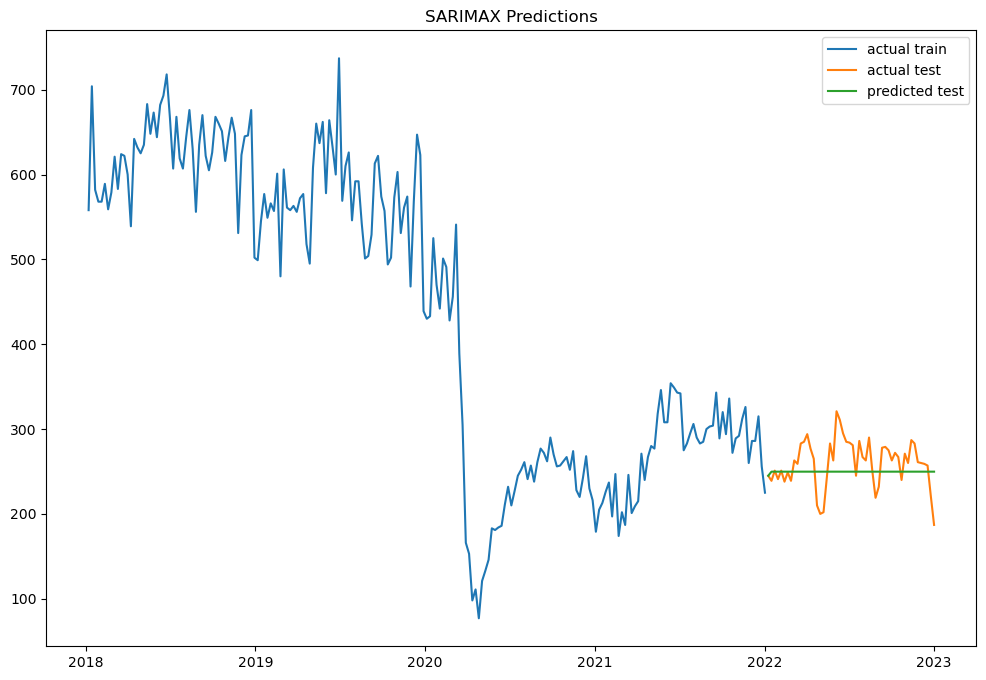

In [56]:
# generate predictions
df_pred3 = third_model.predict(start='2022-01-09', end='2023-01-01')

# plot actual vs. predicted
fig = plt.figure(figsize=(12, 8))
plt.title('SARIMAX Predictions')
plt.plot(train, label='actual train')
plt.plot(test, label='actual test')
plt.plot(df_pred3, label='predicted test');
plt.legend();

In [57]:
Arima_model=auto_arima(ts_mv['Moving Violation'], start_p=1, start_q=1, max_p=4, max_q=4, start_P=0, 
                       start_Q=0, max_P=4, max_Q=4, m=12, seasonal=True, trace=True, d=1, D=1, 
                       error_action='warn', suppress_warnings=True, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2750.521, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2783.789, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2701.093, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2753.757, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2673.522, Time=0.66 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2661.706, Time=1.39 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2660.502, Time=2.24 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=5.24 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=2676.500, Time=1.37 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=2657.364, Time=2.27 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=2658.671, Time=2.26 sec
 ARIMA(2,1,0)(4,1,1)[12]             : AIC=inf, Time=7.22 sec
 ARIMA(2,1,0)(3,1,1)[12]             : 

In [58]:
Arima_mode2=auto_arima(train, start_p=1, start_q=1, max_p=4, max_q=4, start_P=0, 
                       start_Q=0, max_P=4, max_Q=4, m=12, seasonal=True, trace=True, d=1, D=1, 
                       error_action='warn', suppress_warnings=True, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2204.548, Time=0.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2232.902, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2170.156, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2207.042, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2148.807, Time=0.49 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2140.717, Time=0.93 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2140.646, Time=1.85 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.13 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=2153.683, Time=1.34 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=2138.238, Time=2.02 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=2138.164, Time=1.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2144.981, Time=0.58 sec
 ARIMA(2,1,0)(3,1,1)[12]          

In [59]:
#
fourth_model = SARIMAX(train['Moving Violation'], order=(0, 1, 1), seasonal_order=(4, 1, 0, 12)).fit()
fourth_model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10764D+00    |proj g|=  1.50950D-02

At iterate    5    f=  5.10645D+00    |proj g|=  1.54503D-02

At iterate   10    f=  5.08718D+00    |proj g|=  6.50860D-02

At iterate   15    f=  5.07983D+00    |proj g|=  1.14752D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     19      1     0     0   1.322D-06   5.080D+00
  F =   5.0798333248046328     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                    Moving Violation   No. Observations:                  209
Model:             SARIMAX(0, 1, 1)x(4, 1, [], 12)   Log Likelihood               -1061.685
Date:                             Wed, 12 Apr 2023   AIC                           2135.370
Time:                                     14:03:21   BIC                           2155.039
Sample:                                 01-07-2018   HQIC                          2143.333
                                      - 01-02-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3732      0.055     -6.751      0.000      -0.482      -0.265
ar.S.L12      -0.7120      0.074     -9.586      0.000      -0.858      -0.566
ar.S.L24      -0.5311      0.089     -5.939      0.000      -0.706      -0.356
ar.S.L36      -0.2964      0.090     -3.279      0.001      -0.473      -0.119
ar.S.L48      -0.1126      0.083     -1.364      0.173      -0.274       0.049
sigma2      2845.3047    241.559     11.779      0.000    2371.858    3318.751
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                21.97
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
#
train_pred4 = fourth_model.predict()

#
fourth_model_rmse = np.sqrt(mean_squared_error(train, train_pred4))

print(f'Fourth ARIMA Model RMSE: {fourth_model_rmse}')


Fourth ARIMA Model RMSE: 70.64270070937913


In [61]:
#
fifth_model = SARIMAX(train['Moving Violation'], order=(3, 1, 0), seasonal_order=(4, 1, 0, 12)).fit()
fifth_model.summary()

#
train_pred5 = fifth_model.predict()

#
fifth_model_rmse = np.sqrt(mean_squared_error(train, train_pred5))

print(f'fifth ARIMA Model RMSE: {fifth_model_rmse}')


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.10717D+00    |proj g|=  4.65002D-02

At iterate    5    f=  5.10334D+00    |proj g|=  1.02569D-02

At iterate   10    f=  5.08169D+00    |proj g|=  5.92997D-02

At iterate   15    f=  5.07598D+00    |proj g|=  8.43088D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     20      1     0     0   3.440D-05   5.076D+00
  F =   5.0759837267444006     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
fifth AR

In [134]:
from pmdarima.arima import auto_arima

In [135]:
model_auto = auto_arima(ts_mv['Moving Violation'])
model_auto

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [136]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  261
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1354.160
Date:                Wed, 12 Apr 2023   AIC                           2714.320
Time:                        14:42:00   BIC                           2725.002
Sample:                    01-07-2018   HQIC                          2718.614
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3186      0.042     -7.556      0.000      -0.401      -0.236
ma.L2         -0.1137      0.049     -2.339      0.019      -0.209      -0.018
sigma2      1954.7572    110.987     17.613      0.000    1737.227    2172.287
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               100.10
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
model_auto = auto_arima(train['Moving Violation'], 
                        m=7, max_order=None, max_p = 4, max_q=4, max_d=2,
                        max_P = 4, max_Q = 4, max_D=2,
                        maxiter=50, alpha=0.05, n_jobs=-1, trend='ct', information_criterion='aic',
                        out_of_sample_size=int(len(test)))

#m = cycle length --> weekly = 7 

In [138]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -1101.771
Date:                Wed, 12 Apr 2023   AIC                           2213.542
Time:                        14:52:24   BIC                           2230.229
Sample:                             0   HQIC                          2220.289
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2579      5.074      0.248      0.804      -8.687      11.203
drift         -0.0229      0.050     -0.454      0.650      -0.122       0.076
ma.L1         -0.3264      0.060     -5.414      0.000      -0.444      -0.208
ma.L2         -0.1102      0.069     -1.588      0.112      -0.246       0.026
sigma2      2737.4455    248.056     11.036      0.000    2251.264    3223.627
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                54.77
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""